In [32]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [33]:
# model = tf.keras.models.load_model('baseline_model.keras')

In [34]:
model = tf.keras.models.load_model('/Users/daviddiaz/Desktop/Main/Flower-Classification-Api-Server/EfficientNetB0.h5', compile=False)

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 104)            │        26,728 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,404,235 (16.80 MB)

 Trainable params: 2,293,576 (8.75 MB)

 Non-trainable params: 2,110,659 (8.05 MB)

In [36]:
# The list of class names that I found (need to verify)
classes = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']                                                                                                                                               # 100 - 102

### Baseline processing

In [37]:
# img_path = "sunflower.jpeg"  # Replace with your actual file path
# img = image.load_img(img_path, target_size=(240, 240))

# img_array = image.img_to_array(img) / 255.0
# img_array = np.expand_dims(img_array, axis=0)

# # Step 3: Predict
# prediction = model.predict(img_array)
# predicted_class = np.argmax(prediction, axis=1)[0]
# predicted_name = classes[predicted_class]

# # Step 4: Visualize
# plt.imshow(img)
# plt.title(f"🌸 Predicted: {predicted_name} ({predicted_class})")
# plt.axis('off')
# plt.show()

# # Step 5: Print output
# print("Prediction vector:", prediction)
# print(f"Predicted class index: {predicted_class}")
# print(f"Predicted class name: {predicted_name}")

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "efficientnetb0" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 240, 240, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 240, 240, 3), dtype=float32)
  • training=False
  • mask=None

#### Efficient Net B0

In [39]:
print(model.input_shape)


(None, 224, 224, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


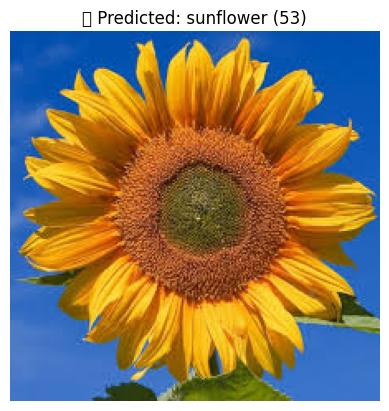

Prediction vector: [[1.47613810e-26 8.15345752e-30 7.99664579e-21 1.24618537e-26
  3.55567257e-28 5.25203112e-23 1.25528588e-23 3.60999689e-22
  2.31254967e-18 9.31697031e-24 2.82055555e-15 7.99647346e-26
  7.34916855e-22 4.36528574e-20 2.97844373e-21 1.78876268e-22
  1.02133474e-23 1.07303493e-24 8.30720263e-22 5.50433313e-23
  5.98299090e-24 5.71905569e-25 1.97604360e-27 2.04985467e-24
  8.89459780e-22 5.48272317e-17 5.07114914e-19 1.52750719e-23
  6.71818102e-19 3.68524697e-28 3.54806339e-25 5.42544539e-32
  1.65711416e-22 3.96332694e-28 7.11374128e-23 2.10518915e-27
  1.49434447e-30 9.79197101e-30 4.35224989e-20 2.02310429e-20
  1.03188407e-17 1.52296035e-19 3.19351316e-22 1.25231217e-21
  3.41934678e-24 3.63876757e-15 3.71045564e-20 3.77492637e-22
  3.96204521e-19 2.11079246e-21 5.51688020e-24 7.65805262e-25
  1.63245890e-19 1.00000000e+00 1.19070320e-25 2.42479333e-22
  3.16577575e-28 1.24580444e-27 1.90062822e-24 1.75189527e-25
  2.40489697e-21 1.30785703e-24 2.90631335e-18 3.28

In [40]:
img_path = "sunflower.jpeg"  # Replace with your actual file path
img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img).astype(np.float32)  # Keep pixel values in [0, 255]
img_array = np.expand_dims(img_array, axis=0)

# Step 3: Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_name = classes[predicted_class]

# Step 4: Visualize
plt.imshow(img)
plt.title(f"🌸 Predicted: {predicted_name} ({predicted_class})")
plt.axis('off')
plt.show()

# Step 5: Print output
print("Prediction vector:", prediction)
print(f"Predicted class index: {predicted_class}")
print(f"Predicted class name: {predicted_name}")